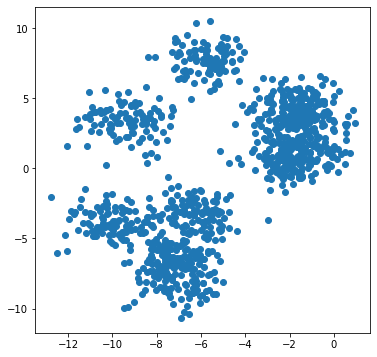

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

## sklearn.cluster.DBSCAN

一种基于密度的聚类方法，聚类前不需要预先指定聚类的个数，生成的簇的个数不定（和数据有关）。该算法利用基于密度的聚类的概念，即要求聚类空间中的一定区域内所包含对象（点或其他空间对象）的数目不小于某一给定阈值。该方法能在具有噪声的空间数据库中发现任意形状的簇，可将密度足够大的相邻区域连接，能有效处理异常数据。

DBSCAN算法将数据点分为三类：

- 核心点：在半径Eps内含有不少于MinPts数目的点
- 边界点：在半径Eps内点的数量小于MinPts，但是落在核心
点的邻域内
- 噪音点：既不是核心点也不是边界点的点

DBSCAN算法有以下几个特点：

- 需要提前确定$\varepsilon$和$M$值
- 不需要提前设置聚类的个数
- 对**初值选取敏感**，对噪声不敏感
- 对密度不均的数据聚合效果不好

---

- eps: float, default=0.5  == $\varepsilon$
- min_samples: int, default=5 == $M$
- metricstr, or callable, default=’euclidean’ 距离度量方式
- 注：噪点noise的指标label=-1

> 例子 https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

4 	 35
------------------------------
[[ -1  35]
 [  0  93]
 [  1 387]
 [  2 394]
 [  3  91]]


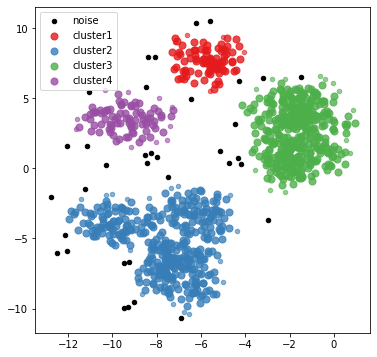

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = DBSCAN(eps=0.7, min_samples=5).fit(X)

# print(mod.core_sample_indices_) # 核心点的下标
# print(mod.components_) # 核心点的特征（坐标）
# print(mod.labels_) # 簇划分


core_samples_mask = np.zeros_like(mod.labels_, dtype=bool)
core_samples_mask[mod.core_sample_indices_] = True # 标记核心点
labels = mod.labels_
unique_labels = np.unique(labels)
n_labels = len(set(labels))
n_clusters = n_labels - (1 if -1 in unique_labels else 0) # 判断是否有噪点
n_noise = list(labels).count(-1)

print(n_clusters, '\t', n_noise)
print('-'*30)
print(np.asarray(np.unique(labels, return_counts=True)).T) # 统计每个簇的点数


# colors_list = [cm.rainbow(i) for i in np.linspace(0, 1, n_labels)]
colors_list = [cm.Set1(i) for i in np.arange(n_labels)]
fig, ax = plt.subplots(figsize=(6, 6))

xy = X[labels == -1, :] # 噪声点
ax.scatter(xy[:, 0], xy[:, 1], c='black', marker='o', s=20, label='noise')
for j in range(n_clusters):
    xy = X[(labels == j) & core_samples_mask, :] # 核心点
    ax.scatter(xy[:, 0], xy[:, 1], color=colors_list[j], label=f'cluster{j+1}', alpha=0.8, s=50)
    xy = X[(labels == j) & ~core_samples_mask, :] # 边界点
    ax.scatter(xy[:, 0], xy[:, 1], color=colors_list[j], alpha=0.6, s=20)
ax.legend(loc='best')
plt.show()

## 参数选取


方法1：搜索
> 集成学习聚类算法DBSCAN密度聚类算法详解和可视化调参 - statr的文章 - 知乎   https://zhuanlan.zhihu.com/p/69433949

- 选择一定的步长遍历两个系数
- 计算轮廓系数和噪声比，并进行可视化
- 选择出合适的系数


方法2：k-dist图像，找拐点
> 请问DBSCAN聚类算法中确定参数的k-dist图怎么画？ - 小翔的回答 - 知乎 https://www.zhihu.com/question/453833422/answer/1833033305

- k=4
- 计算每个点的k近邻距离序列，并排序
- 画图，找出拐点，拐点距离即为epsilon

## sklearn.cluster.OPTICS

- OPTICS(Ordering Points To Identify the Clustering Structure, OPTICS)实际上是DBSCAN算法的一种有效扩展，主要解决对输入参数敏感的问题。即选取**有限个邻域参数**进行聚类，这样就能得到不同邻域参数下的聚类结果。
- 它保持可变邻域半径的集群层次结构。比 DBSCAN 的当前 sklearn 实现更适合在大型数据集上使用。